## Haberman's Survival Data
(https://www.kaggle.com/gilsousa/habermans-survival-data-set)

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Input attributes are:<br>
 1.Age of patient at time of operation (age-numerical)<br>
 2.Patient's year of operation (year, numerical)<br>
 3.Number of positive axillary nodes detected (nodes-numerical)
 
* Output attribute is: Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year

The reference of the above knowledge is taken from:
http://neuroph.sourceforge.net/tutorials/HebermanSurvival/HabermansSurvival.html

# Objective:
To Classify patients who had undergone surgery for breast cancer , will survive for 5 years or longer OR die within 5 year!

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
haberman=pd.read_csv("haberman.csv")

In [63]:
haberman.shape

(306, 4)

In [64]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [65]:
haberman["status"].value_counts()
#Haberman is an unbalanced dataset as the number of data points for every class is unequal.

1    225
2     81
Name: status, dtype: int64

# 2-D Scatter plot 

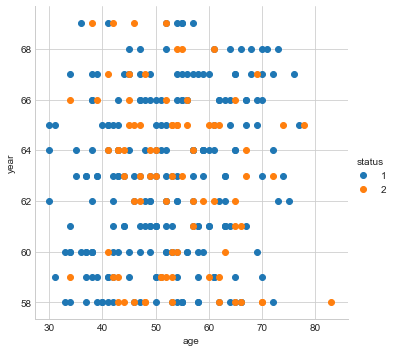

In [66]:
# 2-D Scatter plot with color-coding for each status/class.
sns.set_style("whitegrid");
sns.FacetGrid(haberman,hue="status",size=5)\
.map(plt.scatter,"age","year")\
.add_legend();
plt.show();
#none of the colour points are seperable
#plotting combinations of each features in pairs!

### Observation:
 This plot just gives us an idea, but both classes are non-distinguishable

## Pair Plots

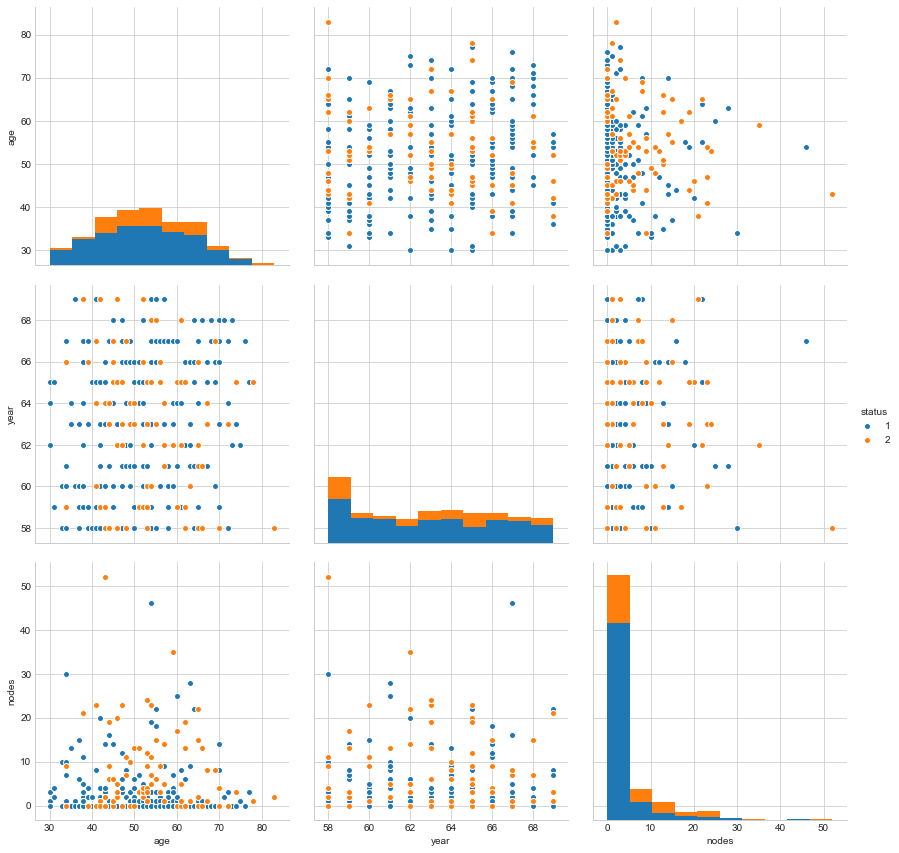

In [67]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(haberman,hue="status",vars=["age","year","nodes"],size=4);
#vars is used to mention features for which we want to plot ,otherwise it plots for status also which we don't want.
plt.show();

## Observations:
<br>1.Diagonals show that , both the status is non-seperable from each other in all the features.<br>
2.Thus, we cannot draw a linear line in any plot which seperate one class from another linearly.


# Histogram, PDF, CDF

In [68]:
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];

## 1-D Scatter Plot

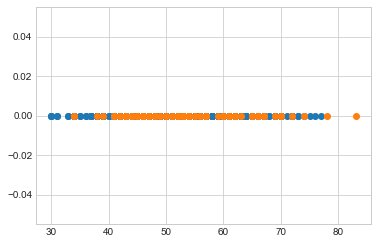

In [69]:
plt.plot(haberman_1["age"], np.zeros_like(haberman_1['age']), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2['age']), 'o')
plt.show()
#1-D Scater plot overlapping a lot

## Histograms

C:\Users\hp\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


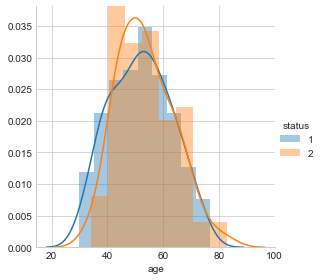

In [70]:
sns.FacetGrid(haberman,hue="status",size=4)\
.map(sns.distplot,"age")\
.add_legend();


C:\Users\hp\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


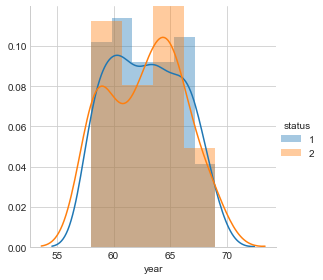

In [71]:
sns.FacetGrid(haberman,hue="status",size=4)\
.map(sns.distplot,"year")\
.add_legend();
plt.show()

C:\Users\hp\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


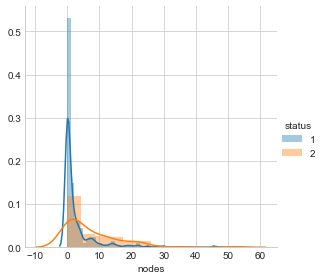

In [72]:
sns.FacetGrid(haberman,hue="status",size=4)\
.map(sns.distplot,"nodes")\
.add_legend();


### Observations(s):
* Using 1-D scatter plot(histograms), do not give such results which can distinguish both the status/classes.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


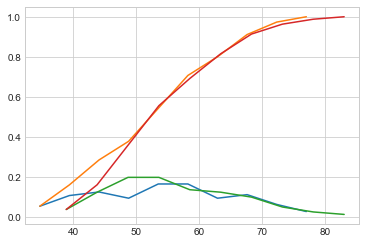

In [73]:
# PDF and CDF for both status
# 1
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# 2
counts, bin_edges = np.histogram(haberman_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


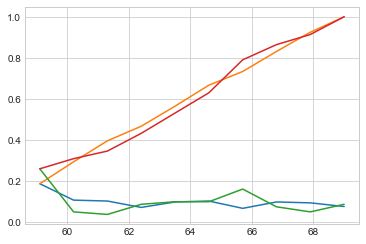

In [74]:
# 1
counts, bin_edges = np.histogram(haberman_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# 2
counts, bin_edges = np.histogram(haberman_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


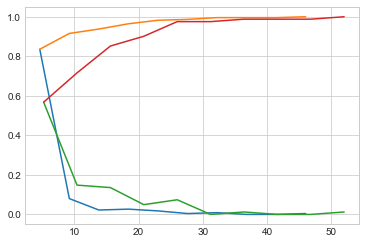

In [75]:
# 1
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# 2
counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

## Mean, Median and Std Dev

In [76]:
# means
print("Means")
print(np.mean(haberman_1["age"]))
print(np.mean(haberman_2["age"]))

print("\nStd-dev:");
print(np.std(haberman_1["age"]))
print(np.std(haberman_2["age"]))

print("\nMedian:");
print(np.median(haberman_1["age"]))
print(np.median(haberman_2["age"]))

#Median with an outlier
print("\nMedian with outlier")
print(np.median(np.append(haberman_1["age"],500)));

#Mean with outlier
print("\nMean with outlier")
print(np.mean(np.append(haberman_1["age"],500)));


Means
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131

Median:
52.0
53.0

Median with outlier
52.0

Mean with outlier
54.0


### Observation(s):
* Median do not corrupt data(value remains same) if any outliers come , while mean corrupts data(value changes).

In [77]:
print("Means")
print(np.mean(haberman_1["year"]))
print(np.mean(haberman_2["year"]))
print("\nMedian")
print(np.median(haberman_1["year"]))
print(np.median(haberman_2["year"]))
print("\nSTD DEV")
print(np.std(haberman_1["year"]))
print(np.std(haberman_2["year"]))

Means
62.86222222222222
62.82716049382716

Median
63.0
63.0

STD DEV
3.2157452144021956
3.3214236255207883


In [78]:
print("Means")
print(np.mean(haberman_1["nodes"]))
print(np.mean(haberman_2["nodes"]))
print("\nMedian")
print(np.median(haberman_1["nodes"]))
print(np.median(haberman_2["nodes"]))
print("\nSTD DEV")
print(np.std(haberman_1["nodes"]))
print(np.std(haberman_2["nodes"]))

Means
2.7911111111111113
7.45679012345679

Median
0.0
4.0

STD DEV
5.857258449412131
9.128776076761632


## Observation(s):
* Value of mean and median for all input features are calculated.
* For "age" feature, value of mean and median is closest,then followed by "year" feature.

# Percentile, Quantile, IQR, MAD

In [79]:
print("\nQuantiles:")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))


Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]


In [80]:
print("\n90th Percentiles:")
print(np.percentile(haberman_1["age"],90))
print(np.percentile(haberman_2["age"],90))


90th Percentiles:
67.0
67.0


In [81]:
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["age"]))
print(robust.mad(haberman_2["age"]))


Median Absolute Deviation
13.343419966550417
11.860817748044816


## Box plot and Whiskers

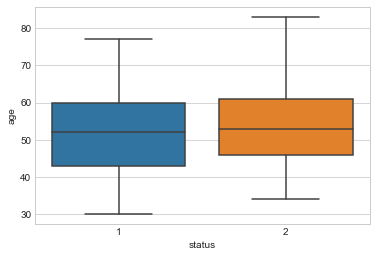

In [82]:
#1-D Scatter plots
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

## Observation(s):
* Status 1 belongs to age group 42-60.
* Status 2 belongs to age group 46-61.

## Violin plots

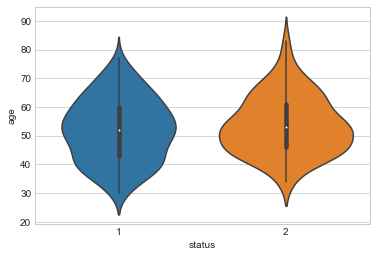

In [83]:
# 1-D Scatter plot(combination of both PDF and box and whiskers plot)
sns.violinplot(x="status", y="age", data=haberman, size=6)
plt.show()

## Observation(s):
* Mainly from age group 42-60 will belong to status 1
* From age group 45-63 belongs to status 2
* Sides represent PDF's ,and middle represents box plot.

## Contors-plot


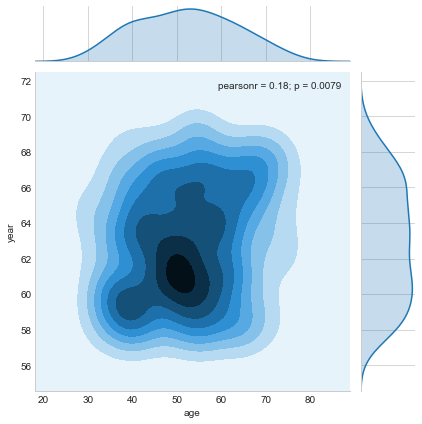

In [84]:
#2D Density plot, contors-plot
#Age and year are 2 best features for a 2D plot to be considered.
sns.jointplot(x="age", y="year", data=haberman_1, kind="kde");
plt.show();

## Observation(s):
* People of age group 48-54, and year of operation 60-62 will survive for more than 5 years.
* Dark colour in middle represents more height.
* Light colour represents lesser height ,at outer boundary. 

# Conclusion(s):
* Exploratory Data Analysis on Haberman Survival Dataset, which gives good understanding of the problem.
* I have plot 1-D scatter plot, 2-D scatter Plot, Pair Plot, Histogram, PDF, CDF, Violin plots, Contors-plot, Box and Whishkers plot and calculated Mean, variance, Standard Dev, Median, Quantiles, Percentiles, IQR for the this dataset.